# 1.2 Opentruns : Distributions univariées et multivariées

## Résumé

Dans cette page, nous présentons les objets permettant d'utiliser des lois univariées et multivariées. Pour les lois univariées, nous montrons comment calculer la densité de probabilité, la fonction de répartition et les quantiles. Nous montrons également comment produire des graphiques. 

TODO : 
- montrer la troncature
- computeMinimumVolumeInterval

## Références

- http://openturns.github.io/openturns/master/user_manual/probabilistic_modelling.html

- https://en.wikipedia.org/wiki/Probabilistic_programming_language


## Lois univariées

OpenTURNS procède par programmation probabiliste : on peut créer une variable aléatoire et réaliser des manipulations sur ces variables, *sans* générer d'échantillon. 

Plusieurs distributions sont disponibles. Les plus courantes sont :

 - `Uniform`,
 - `Normal`,
 - `Beta`, 
 - `LogNormal`, 
 - `Exponential`, 
 - `Weibull`,
 
mais d'autres lois plus bizarres sont aussi disponibles :

 - `ZipfMandelbrot`,
 - `Skellam`,
 - `Meixner`.

In [1]:
import openturns as ot

## Loi univariée uniforme

Créons une variable uniforme : $\mathcal{U(2,5)}$.

In [2]:
u = ot.Uniform(2,5)

La méthode `drawPDF` permet de dessiner la densité de probabilité.

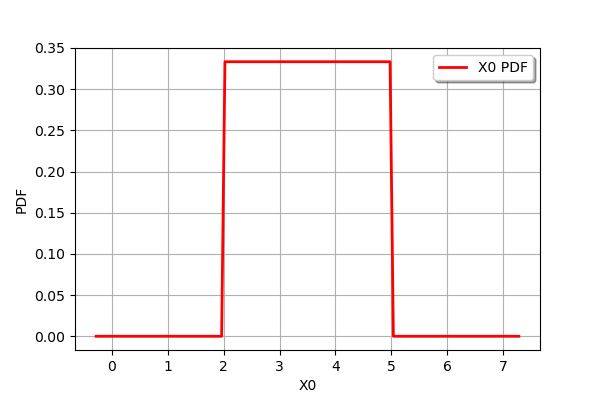

In [3]:
u.drawPDF()

La méthode `computePDF` permet de calculer la densité de probabilité en un point donné. 

In [4]:
u.computePDF(3.5)

0.3333333333333333

La méthode `drawCDF` permet de dessiner la fonction de répartition. 

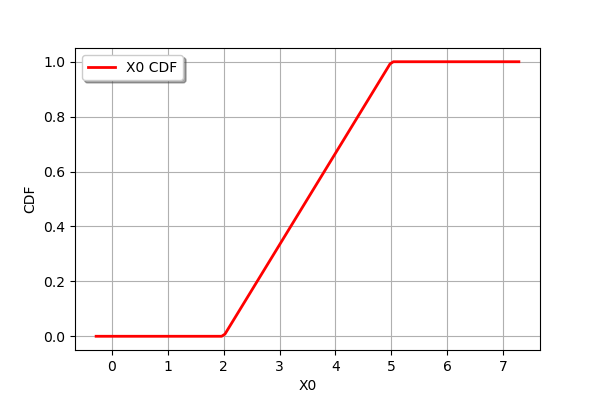

In [5]:
u.drawCDF()

La méthode `computeCDF` calcule la valeur de la fonction de répartition en point.

In [6]:
u.computeCDF(3.5)

0.5

La méthode `getSample` permet de générer un échantillon.

In [7]:
sample = u.getSample(10)
sample

class=Sample name=Uniform implementation=class=SampleImplementation name=Uniform size=10 dimension=1 description=[X0] data=[[3.88963],[4.64842],[2.40583],[2.09751],[3.04117],[4.90827],[4.76204],[3.50912],[2.18962],[2.87827]]

La manière la plus classique d'observer un échantillon consiste à dessiner l'histogramme empirique.

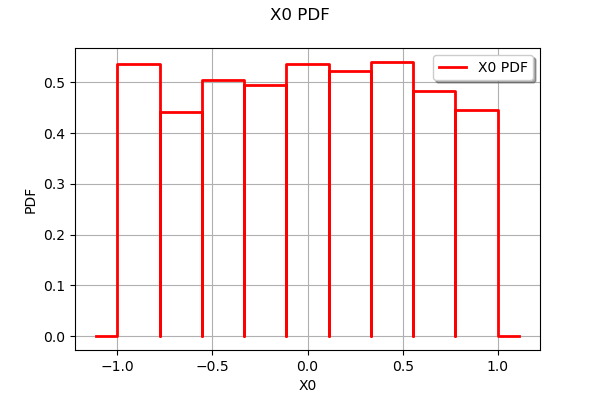

In [22]:
sample = u.getSample(1000)
ot.HistogramFactory().build(sample).drawPDF()

## Lois multivariées

Pour créer des lois multivariées, on peut utiliser deux méthodes :
- certaines distributions sont multivariées par définition : `Normal`, `Dirichlet`, `Student`
- on peut aussi définir une loi multivariée par combinaison :
 - d'une liste de lois marginales univariées.
 - une copule.

Dans le script suivant, nous définissons une loi multivariée en dimension 2 constituée de deux lois marginales gaussiennes et uniforme indépendantes.

In [25]:
n = ot.Normal()
u = ot.Uniform()
c = ot.IndependentCopula(2)
R = ot.CorrelationMatrix(2)
R[0,1] = 0.6
c = ot.NormalCopula(R)
d = ot.ComposedDistribution([n, u], c)
d.getSample(10)

class=Sample name=ComposedDistribution implementation=class=SampleImplementation name=ComposedDistribution size=10 dimension=2 description=[X0,X1] data=[[-0.137008,0.210516],[0.913313,-0.133609],[0.389674,0.833477],[1.57797,-0.134122],[1.43978,-0.33761],[-0.319705,-0.109666],[-0.765657,0.842889],[1.02465,0.8435],[-0.256681,0.763144],[-1.04829,-0.733528]]

Pour visualiser un nuage de points bi-dimensionnel, on peut utiliser la classe `Cloud`.

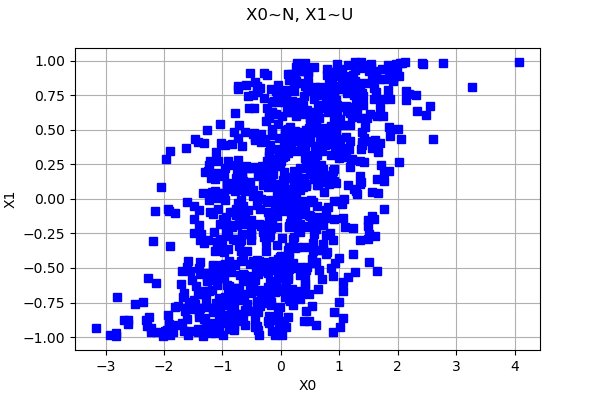

In [26]:
sample = d.getSample(1000)
showAxes = True
graph = ot.Graph("X0~N, X1~U", "X0", "X1", showAxes)
cloud = ot.Cloud(sample, "blue", "fsquare", "") # Create the cloud
graph.add(cloud) # Then, add it to the graph
graph

En fait, le second argument de la classe `ComposedDistribution` est optionnel : si il n'est pas présent, alors la copule est indépendante.

In [11]:
ot.ComposedDistribution([n, u])

class=ComposedDistribution name=ComposedDistribution dimension=2 copula=class=IndependentCopula name=IndependentCopula dimension=2 marginal[0]=class=Normal name=Normal dimension=1 mean=class=Point name=Unnamed dimension=1 values=[0] sigma=class=Point name=Unnamed dimension=1 values=[1] correlationMatrix=class=CorrelationMatrix dimension=1 implementation=class=MatrixImplementation name=Unnamed rows=1 columns=1 values=[1] marginal[1]=class=Uniform name=Uniform dimension=1 a=-1 b=1

La classe `NormalCopula` permet de créer une copule gaussienne. Une telle copule est paramétrée par sa matrice de corrélation. 

In [12]:
R = ot.CorrelationMatrix(2)
R[0,1] = 1.0
R[1,1]
c = ot.NormalCopula(R)
c

class=NormalCopula name=NormalCopula dimension=2 correlation=class=CorrelationMatrix dimension=2 implementation=class=MatrixImplementation name=Unnamed rows=2 columns=2 values=[1,1,1,1]

On peut dessiner les iso-valeurs d'une copule avec la méthode `drawPDF`.

/home/duprez/.local/lib/python3.10/site-packages/openturns/viewer.py:517: UserWarning: No contour levels were found within the data range.
  contourset = self._ax[0].contour(X, Y, Z, **contour_kw)


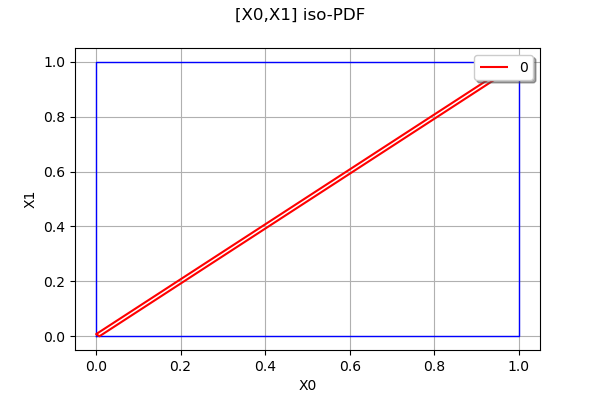

In [13]:
c.drawPDF()

## Exercice 1 : loi Beta

- Créer une distribution `Beta` de paramètres suivants :
  - $\alpha=5$ : premier paramètre de forme, 
  - $\beta=2$ : second paramètre de forme, 
  - $a=9$ : borne inférieure, 
  - $b=10$ : borne supérieure
- Dessiner la PDF, la CDF
- Quelle méthode permet de savoir si cette distribution est continue ?

## Exercice 2 : loi exponentielle

- Créer une variable `Exponential` de moyenne $\lambda=3$.
- Dessiner la PDF, la CDF
- Est-elle continue ?

## Exercice 3 : une variable de Bernoulli

- Créer une variable de Bernoulli telle que :

\begin{align*}
P(X=1)&=0.7 \\
P(X=0)&=0.3
\end{align*}

En d'autres termes, créer une variable de Bernoulli de paramètre $p=0.7$

- Dessiner la PDF
- Quel est son support ?

## Exercice 4 : défaillance de disques

Les disques d'une certaine société sont défectueux avec une probabilité égale à 0.01. On fait l'hypothèse que les défaillances sont indépendances entre deux disques. 

La société vend les disques par lots de 10 et offre une garantie de remboursement si plus d'un disque est défectueux dans le lot. 

- Quelle est la probabilité d'avoir un retour de lot ? 
- Si on achète trois lots, quelle est la probabilité que exactement un lot soit retourné ?

## Exercice 5 : pluviosité à Los Angeles

Les données du "National Oceanic and Atmospheric Administration" indiquent que le cumul de précipitations pour une année à Los Angeles suit une loi gaussienne de moyenne 12.08 pouces et d'écart-type 3.1 pouces.

Dans cet exercice, on fait l'hypothèse que les cumuls de précipitations entre deux années sont indépendants.

- Calculer la probabilité d'observer un cumul annuel supérieur à 15 pouces.
- Calculer la probabilité que le cumul de précipitations pendant deux ans soit supérieur à 25 pouces.
- Calculer la probabilité que la différence de cumul entre deux années soit supérieure à 3 pouces.

## Exercice 6 : taille des hommes

Références : 
- [1] Statistical Abstract of the United States U.S. Census Bureau. Table 209. Cumulative percent distribution
of population by height and sex : 2007-2008, 2012. https://www.census.gov/compendia/statab/2012/tables/12s0209.pdf
- [2] Mark F. Schilling, Ann E. Watkins, and William Watkins. Is human height bimodal ? The American
Statistician, American Statistical Association, 56(3) :223–229, 2002.

Le bureau de recensement des Etats-Unis fournit des statistiques sur ce pays. La table 209 dans [1] présente la distribution de la population par taille et par sexe. Bien que la question soit controversée [2], on pense que la distribution de la taille des hommes suit approximativement la loi Gaussienne.

Soit X la taille d’un homme dont l’âge est entre 20 et 79 ans D’après les données dans [1], on peut
estimer que la moyenne et l’écart-type sont $\mu = 1.7633$ (m) et $\sigma = 0.0680$ (m).

- Quelle est la probabilité que la taille d’un homme soit inférieure à 2 mètres ? Quelle est la probabilité d'avoir une taille supérieure à 2 mètres ?
- Quel est le quantile de niveau $p=0.99$ ? Quel est son sens physique ?

## Exercice 7 : une loi gaussienne bidimensionnelle 

- Build a collection of marginals which includes two normal distributions $X \sim \mathcal{N}(0,1)$;
- Create a ComposedDistribution using the previous collection only;
- Create a ComposedDistribution using the previous collection and a `Copula` structure (independent);
- Create a composedDistribution using the previous collection and a `Copula` structure (Normal copula with $\rho=0.6$);
- Get a `Sample` of size $1000$; plot it.

## Annexe : dessiner plusieurs distributions dans un même graphique

In [14]:
myBeta = ot.Beta(5, 2, 9, 10)
myPDFBeta = myBeta.drawPDF()
myCDFBeta = myBeta.drawCDF()
myExponential = ot.Exponential(3)
myPDFExp = myExponential.drawPDF()
myCDFExp = myExponential.drawCDF()

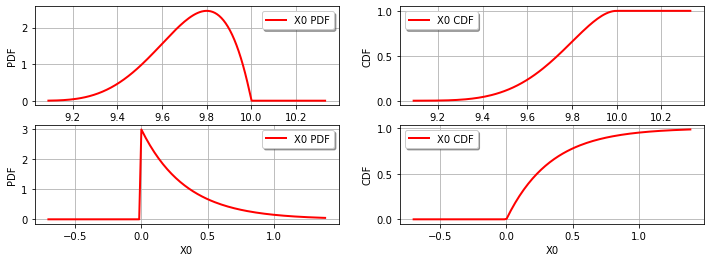

In [15]:
import pylab as plt
import openturns.viewer
fig = plt.figure(figsize=(12, 4))
ax_pdf = fig.add_subplot(2, 2, 1)
_ = ot.viewer.View(myPDFBeta, figure=fig, axes=[ax_pdf])
ax_cdf = fig.add_subplot(2, 2, 2)
_ = ot.viewer.View(myCDFBeta, figure=fig, axes=[ax_cdf])
ax_pdf_exp = fig.add_subplot(2, 2, 3)
_ = ot.viewer.View(myPDFExp, figure=fig, axes=[ax_pdf_exp])
ax_cdf_exp = fig.add_subplot(2, 2, 4)
_ = ot.viewer.View(myCDFExp, figure=fig, axes=[ax_cdf_exp])